In [28]:
import os
import PIL.Image as Image
import torch.cuda
import torchvision.transforms as transforms
import numpy as np

from LookGenerator.datasets.utils import prepare_images_for_encoder, to_array_from_decoder, load_image, convert_channel, show_array_as_image, save_array_as_image
from LookGenerator.networks.encoder_decoder import EncoderDecoder
from LookGenerator.networks.utils import load_model

# Загрузка изображений

In [68]:
root = r"C:\Users\Даша\кто\мусор\zalando-hd-resized\val"
file_name = r"00006_00"

human_image = load_image(root, r"imageWithNoCloth", file_name, ".png")
clothes = load_image(root, r"cloth", file_name, r".jpg")

pose_points = []
points_list = os.listdir(os.path.join(
    root,
    r"posePoints",
    file_name
))
print(len(points_list))
for pose_point in points_list:
    pose_point_image = convert_channel(load_image(root, os.path.join(r"posePoints", file_name), pose_point, ""))
    pose_points.append(pose_point_image)

# if model dataset has pose_points=False param:
pose_points = []

17


# Определение трансформаций

In [69]:
input_rgb_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.25, 0.25, 0.25]
    )
])

input_bin_transform = transforms.Compose([
    transforms.Resize((256, 192)),
    transforms.Normalize(
        mean=[0.5],
        std=[0.25]
    )
])

# Загрузка весов модели

In [70]:
model_input = prepare_images_for_encoder(human_image, pose_points, clothes, input_rgb_transform, input_bin_transform).float()

In [71]:
weights_dir = r"C:\Users\Даша\PycharmProjects\SMBackEnd\LookGenerator\weights\epoch_19.pt"

In [72]:
model = EncoderDecoder(in_channels=6, out_channels=3)
model = load_model(model, weights_dir)

In [73]:
device = 'cpu' if torch.cuda.is_available() else 'cpu'

model = model.to(device)
model_input = model_input.to(device)

# Прогон модели

In [74]:
model_output = model(model_input)

# Отображение результата

In [75]:
model_output = to_array_from_decoder(model_output)

In [76]:
to_plt = np.array(model_output)

In [77]:
c = np.array(to_plt[:,:,0])
to_plt[:,:,0] = to_plt[:,:,2]
to_plt[:,:,2] = c

In [78]:
model_output

array([[[0.8449987 , 0.83590895, 0.8324463 ],
        [0.8792918 , 0.8696269 , 0.86482686],
        [0.8455983 , 0.82961565, 0.8128667 ],
        ...,
        [0.88267463, 0.87507665, 0.87800205],
        [0.8794427 , 0.8697802 , 0.86655754],
        [0.83543146, 0.82336557, 0.8131016 ]],

       [[0.85475594, 0.84362143, 0.84034264],
        [0.8341191 , 0.8312364 , 0.8196452 ],
        [0.83532053, 0.8307558 , 0.82132846],
        ...,
        [0.87184787, 0.8701978 , 0.8683374 ],
        [0.8800649 , 0.87519425, 0.8637501 ],
        [0.8698022 , 0.8606064 , 0.8604543 ]],

       [[0.8556445 , 0.8480738 , 0.84922284],
        [0.83250546, 0.8293667 , 0.8221124 ],
        [0.83325386, 0.8299071 , 0.823892  ],
        ...,
        [0.86679167, 0.86513835, 0.86520267],
        [0.87735206, 0.8741524 , 0.86555654],
        [0.87816703, 0.8684851 , 0.8693679 ]],

       ...,

       [[0.7631763 , 0.73326117, 0.7142402 ],
        [0.7357602 , 0.7166079 , 0.697416  ],
        [0.7402266 , 0

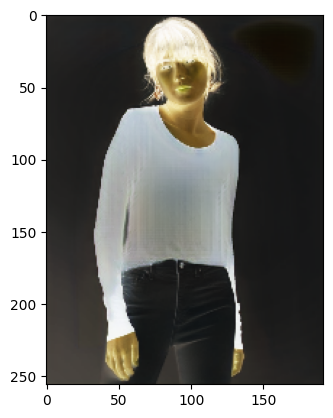

In [79]:
show_array_as_image(np.invert(np.uint8(255*to_plt)))
save_array_as_image(np.uint8(255*model_output), save_path=r"a.png")
